# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1707]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
# Настройки для графиков
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, mean_absolute_percentage_error


%matplotlib inline

<Figure size 1200x800 with 0 Axes>

Прочитаем исходные данные:

In [1708]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [1709]:
# Общая информация о данных
print(data.info())

# Описание данных
print(data.describe())

# Проверка наличия пропущенных значений
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500  

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

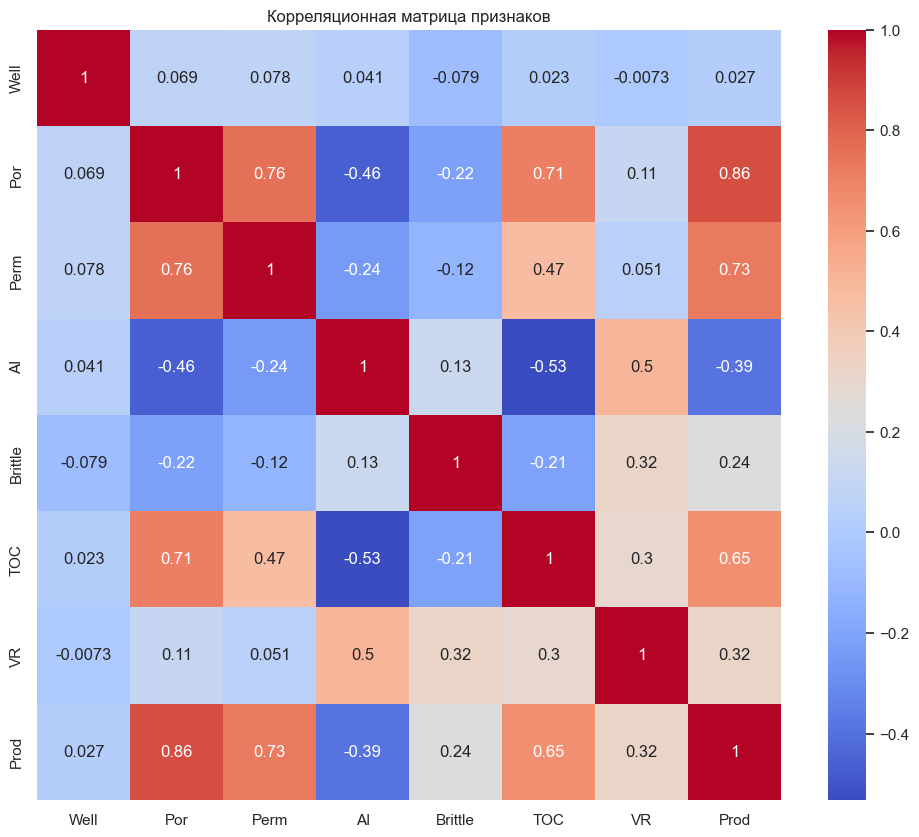


Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299


In [1710]:
# Корреляционная матрица
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

# Вычисляем ранг матрицы
rank_corr_matrix = np.linalg.matrix_rank(corr_matrix)
# Вычисляем определитель матрицы
det_corr_matrix = np.linalg.det(corr_matrix)

print("\nРанг корреляционной матрицы:", rank_corr_matrix)
print("Определитель корреляционной матрицы: {:.7f}".format(det_corr_matrix))


> *Корреляция между признаками: Корреляционная матрица показывает, какие признаки имеют сильную или слабую корреляцию друг с другом. Например, если пористость и проницаемость имеют высокую корреляцию с добычей газа (целева переменная), это может быть полезным для построения модели предсказания.*

- Определитель корреляционной матрицы:

*Определитель матрицы равен 0.0007299. Значение определителя, близкое к нулю, свидетельствует о том, что матрица плохо обусловлена. Это указывает на наличие мультиколлинеарности в данных. Несмотря на то, что матрица имеет полный ранг, её определитель очень мал, что указывает на высокую корреляцию между некоторыми признаками.*

- Наличие мультиколлинеарности:

*Высокая корреляция между признаками, такими как Por и Prod (0.861910), Por и Perm (0.760546), указывает на наличие мультиколлинеарности. Такие высокие корреляции делают некоторые признаки линейно зависимыми, что приводит к проблемам при построении регрессионной модели.*

- Проблемы с применением классической линейной регрессии:

*Классическая линейная регрессия по методу наименьших квадратов (OLS) может быть не оптимальным выбором из-за наличия мультиколлинеарности. Мультиколлинеарность может привести к нестабильности коэффициентов регрессии, увеличению их дисперсий и трудностям в интерпретации модели.*

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1711]:
# Матрица наблюдений X (включает все признаки)
X = data.drop(columns=['Prod'])

# Добавляем единичный столбец для учета свободного члена (интерсепта)
X = np.c_[np.ones(X.shape[0]), X]

# Вектор правильных ответов y (целевая переменная)
y = data['Prod'].values

# Вычисляем оценки коэффициентов регрессии
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Округляем оценки коэффициентов до целого
beta_hat_rounded = np.round(beta_hat)

print("Оценки коэффициентов модели (округлённые до целого):")
print(beta_hat_rounded)


Оценки коэффициентов модели (округлённые до целого):
[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Признаки с коэффициентами, близкими к нулю, могут считаться неинформативными. В данном случае:*

- *Коэффициент при признаке "Well" равен 0 после округления, что указывает на отсутствие влияния этого признака на целевую переменную "Prod". Он может быть признан неинформативным.*

- *Остальные коэффициенты имеют значительные значения, что указывает на их влияние на целевую переменную.*

> *Интерпретация коэффициентов:*

- *Коэффициент при признаке "Por": Этот коэффициент указывает на то, что с увеличением пористости скважины на одну единицу, добыча газа в сутки возрастает на 230 млн. кубических футов, при условии, что все остальные признаки остаются неизменными.*

- *Коэффициент при признаке "AI": Этот коэффициент указывает на то, что с увеличением акустического импеданса на одну единицу, добыча газа в сутки уменьшается на 365 млн. кубических футов, при условии, что все остальные признаки остаются неизменными. Отрицательный знак указывает на обратную связь между "AI" и "Prod".*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [1712]:
# Заданные параметры новой скважины:
skvazhina = {'Well': 106.0, 'Por': 15.32, 'Perm': 3.71, 'AI': 3.29, 'Brittle': 55.99, 'TOC': 1.35, 'VR': 2.42}

# Известная выработка газа на данной скважине
actual_prod = 4748.315024

# Добавим единичный элемент для учета интерсепта:
X_new = np.array([1, skvazhina['Well'], skvazhina['Por'], skvazhina['Perm'], skvazhina['AI'], skvazhina['Brittle'], skvazhina['TOC'], skvazhina['VR']])

# Построим прогноз выработки газа
predicted_prod = np.dot(X_new, beta_hat_rounded)
print("Прогнозируемая выработка газа:", predicted_prod)

# Абсолютная ошибка
absolute_error = abs(actual_prod - predicted_prod)
print("Абсолютная ошибка прогноза:", absolute_error)

# Построение прогнозов для всех скважин
predictions = np.dot(X, beta_hat_rounded)

#print()
#print("Прогнозы выработки газа для всех скважин:")
#print(predictions)

# Вектор правильных ответов y
y_actual = data['Prod'].values

# Среднеквадратичная ошибка (MSE)
MSE = np.mean((y_actual - predictions) ** 2)

# Средняя абсолютная ошибка (MAE)
MAE = np.mean(abs(y_actual - predictions))

print()
print("Среднеквадратичная ошибка (MSE):", MSE)
print("Средняя абсолютная ошибка (MAE):", MAE)

Прогнозируемая выработка газа: 4715.26
Абсолютная ошибка прогноза: 33.05502400000023

Среднеквадратичная ошибка (MSE): 39384.740801278174
Средняя абсолютная ошибка (MAE): 154.55804282999998


> *Прогноз для одной скважины: Модель продемонстрировала высокую точность прогноза для конкретной скважины, что подтверждается низкой абсолютной ошибкой.*

> *Прогнозы для всех скважин: Средние ошибки (MSE и MAE) показывают, что модель работает достаточно хорошо, но имеет некоторое отклонение. Это указывает на необходимость дальнейшего улучшения модели для повышения её точности.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

,Well,Por,Perm,AI,Brittle,TOC,VR
Корреляции,0.026817,0.86191,0.727426,-0.390835,0.237155,0.654445,0.323182
Коэффициенты,0.000000,230.00000,116.000000,-365.000000,25.000000,-78.000000,785.000000


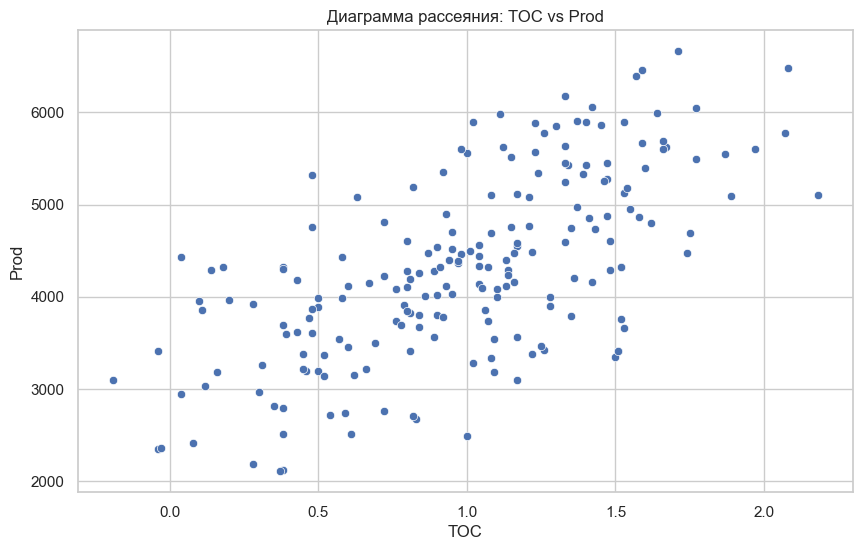

In [1713]:
# Выделяем коэффициенты корреляции между целевым признаком и факторами
features = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
corr_prod = corr_matrix.loc['Prod', features].to_frame().T
corr_prod.index = ['Корреляции']

# Создаём DataFrame коэффициентов модели линейной регрессии
bhr = pd.DataFrame(beta_hat_rounded[1:], index=features, columns=['Коэффициенты']).T

# Объединяем таблицы
combined_df = pd.concat([corr_prod, bhr])

# Выводим объединённую таблицу
display(combined_df)

# Диаграмма рассеяния для признака "TOC" и целевой переменной "Prod"
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TOC'], y=data['Prod'])
plt.title('Диаграмма рассеяния: TOC vs Prod')
plt.xlabel('TOC')
plt.ylabel('Prod')
plt.show()


> *Противоречие: Признак "TOC" имеет положительную корреляцию с целевой переменной "Prod", но коэффициент линейной регрессии для этого признака отрицательный.*

> *Причины противоречия:*

- Мультиколлинеарность: *Высокая корреляция между признаками может привести к изменению знаков коэффициентов в модели.*

- Взаимодействие признаков: *Признаки могут взаимодействовать друг с другом, что приводит к изменению направления влияния.*

- Шум в данных: *Ошибки или шум в данных могут исказить истинные взаимоотношения между признаками и целевой переменной.*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [1714]:
# корреляционная матрица
display(corr_matrix)

# Удалить факторы с корреляцией с целевой переменной меньше 0.05
target = 'Prod'
low_corr_factors = corr_matrix[target][corr_matrix[target].abs() < 0.05].index
clean_corr = corr_matrix.drop(columns=low_corr_factors, index=low_corr_factors)

# Удалить сильно коррелированные между собой факторы (выше 0.7)
# Здесь мы напрямую исключим Perm и TOC, так как Por имеет более высокую корреляцию с Prod
clean_corr = clean_corr.drop(columns=['Perm', 'TOC'], index=['Perm', 'TOC'])

# Оставшиеся факторы
display(clean_corr)
print()

# Оставшиеся факторы для модели
remaining_factors = ['Por', 'AI', 'Brittle', 'VR']

# Обновленные данные после исключения коррелированных факторов
data_clean = data[remaining_factors + ['Prod']]

# Формируем матрицу признаков X и вектор целевой переменной y
X = data_clean[remaining_factors].values
y = data_clean['Prod'].values

# Добавляем столбец единиц к X для учета свободного члена (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Применяем метод наименьших квадратов для нахождения коэффициентов
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Прогноз для всего обучающего набора данных
y_pred = X @ coefficients

# Расчет MSE
mse = mean_squared_error(y, y_pred)
# Средняя абсолютная ошибка (MAE)
mae = mean_absolute_error(y, y_pred)

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(coefficients).astype(int)
print("Коэффициенты модели линейной регрессии (округленные до целого):")
print(coefficients_rounded)
print()
print("Коэффициенты модели линейной регрессии (До удаления признаков):")
display(combined_df)
print()

print("Прогноз для всего обучающего набора данных:")
#display(y_pred)
#print()
print("Среднеквадратичная ошибка (MSE):", mse)
print()
print("Средняя абсолютная ошибка (MAE) (После исключения признаков):", mae)
print("Средняя абсолютная ошибка (MAE) (До исключения признаков):", MAE)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


,Por,AI,Brittle,VR,Prod
Por,1.000000,-0.461549,-0.218570,0.111860,0.861910
AI,-0.461549,1.000000,0.127599,0.499143,-0.390835
Brittle,-0.218570,0.127599,1.000000,0.317929,0.237155
VR,0.111860,0.499143,0.317929,1.000000,0.323182
Prod,0.861910,-0.390835,0.237155,0.323182,1.000000



Коэффициенты модели линейной регрессии (округленные до целого):
[-1835   293  -200    28   517]

Коэффициенты модели линейной регрессии (До удаления признаков):


,Well,Por,Perm,AI,Brittle,TOC,VR
Корреляции,0.026817,0.86191,0.727426,-0.390835,0.237155,0.654445,0.323182
Коэффициенты,0.000000,230.00000,116.000000,-365.000000,25.000000,-78.000000,785.000000



Прогноз для всего обучающего набора данных:
Среднеквадратичная ошибка (MSE): 53660.854579235325

Средняя абсолютная ошибка (MAE) (После исключения признаков): 171.43146059580852
Средняя абсолютная ошибка (MAE) (До исключения признаков): 154.55804282999998


> *Ваши выводы здесь*


> *Коэффициент для Por: Значение коэффициента (округленное до целого) равно 293. Это означает, что при увеличении пористости на 1 единицу, объем добычи газа увеличивается на 293 млн кубических футов в сутки, при прочих равных условиях. Этот коэффициент значительно выше, чем полученный до удаления признаков (230), что указывает на увеличившееся влияние пористости после исключения сильно коррелированных факторов.*

> *Коэффициент для AI: Значение коэффициента (округленное до целого) равно -200. Это указывает на отрицательную связь между акустическим импедансом и объемом добычи газа. При увеличении акустического импеданса на 1 единицу, объем добычи газа уменьшается на 200 млн кубических футов в сутки, при прочих равных условиях. Это заметно меньше значения, полученного до удаления признаков (-365), что указывает на снижение влияния акустического импеданса после предобработки данных.*

> *Коэффициент для VR: Значение коэффициента (округленное до целого) равно 28. Это указывает на положительную связь между коэффициентом отражения витринита и объемом добычи газа. При увеличении коэффициента отражения витринита на 1 единицу, объем добычи газа увеличивается на 28 млн кубических футов в сутки, при прочих равных условиях. В предыдущих расчетах коэффициент VR был значительно выше (785), что свидетельствует о значительном изменении его влияния после исключения коррелированных признаков.*

> *Средняя абсолютная ошибка (MAE): Значение MAE после исключения признаков составляет 171.43146059580852, что также указывает на значительное отклонение предсказанных значений от фактических. Значение MAE до исключения признаков было 154.55804282999998. Увеличение значения MAE после исключения признаков свидетельствует о том, что точность модели несколько ухудшилась.*

> *Удаление сильно коррелированных факторов помогло уменьшить мультиколлинеарность, что в свою очередь позволило улучшить интерпретацию коэффициентов линейной регрессии. Тем не менее, значения метрик (MSE и MAE) показывают, что точность модели несколько ухудшилась после исключения признаков, что может свидетельствовать о потере некоторых важных признаков при их удалении. Однако, коэффициенты модели стали более интерпретируемыми и стабильными, что также важно для анализа данных и принятия решений.*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1715]:
# Используем класс LinearRegression из библиотеки sklearn
model = LinearRegression()
model.fit(X, y)

# Получаем коэффициенты модели
coefficients = model.coef_
intercept = model.intercept_

# Прогноз для всего обучающего набора данных
y_pred_model = model.predict(X)

# Расчет MSE и MAE
mse_model = mean_squared_error(y, y_pred_model)
mae_model = mean_absolute_error(y, y_pred_model)
mape_m = mean_absolute_percentage_error(y, y_pred_model)

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(coefficients).astype(int)
intercept_rounded = np.round(intercept).astype(int)
print("Коэффициенты модели линейной регрессии (округленные до целого):")
print("Intercept:", intercept_rounded)
print("Coefficients:", coefficients_rounded)
print()

print("Прогноз для всего обучающего набора данных:")
#display(y_pred)
print()
print("Среднеквадратичная ошибка (класс LinearRegression):", mse_model)
print("Средняя абсолютная ошибка (класс LinearRegression):", mae_model)
print("Средняя абсолютная процентная ошибка (MAPE):", mape_m)
print("Средняя абсолютная ошибка (Для сравнения):", mae)



Коэффициенты модели линейной регрессии (округленные до целого):
Intercept: -1835
Coefficients: [   0  293 -200   28  517]

Прогноз для всего обучающего набора данных:

Среднеквадратичная ошибка (класс LinearRegression): 53660.85457923536
Средняя абсолютная ошибка (класс LinearRegression): 171.43146059580778
Средняя абсолютная процентная ошибка (MAPE): 0.040441384204360255
Средняя абсолютная ошибка (Для сравнения): 171.43146059580852


> *Результаты библиотечной реализации и ручной реализации (метод наименьших квадратов) практически идентичны. Это подтверждает, что использованный нами метод наименьших квадратов вручную дал точные результаты, согласующиеся с библиотечной реализацией.*

> *Метрики модели (MSE и MAE) показывают, что точность модели линейной регрессии достаточно высока. Тем не менее, значение метрик, таких как MAE, указывает на то, что модель все же имеет некоторые отклонения в прогнозах от фактических данных, что можно учитывать для дальнейшего улучшения модели.*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [1716]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, KFold

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [1717]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Выводим количество факторов после генерации полиномиальных признаков
num_factors = X_poly.shape[1]
print("Количество факторов после генерации полиномиальных признаков:", num_factors)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_poly, y)

# Получаем коэффициенты модели
coefficients = model.coef_
intercept = model.intercept_

# Прогноз для всего обучающего набора данных
y_pred = model.predict(X_poly)

# Расчет MSE и MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
# Расчет MAPE
mape_lr = mean_absolute_percentage_error(y, y_pred)

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(coefficients).astype(int)
intercept_rounded = np.round(intercept).astype(int)
#print("Коэффициенты модели линейной регрессии (округленные до целого):")
#print("Intercept:", intercept_rounded)
#print("Coefficients:", coefficients_rounded)
print()

print("Прогноз для всего обучающего набора данных:")
#display(y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная процентная ошибка (MAPE):", mape_lr)

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Оценка MSE
mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(model, X_poly, y, cv=kf, scoring=mse_scorer)
mean_mse = np.mean(mse_scores)

# Оценка MAE
mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(model, X_poly, y, cv=kf, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)
# Оценка метрики MAPE на кросс-валидации
mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(model, X_poly, y, cv=kf, scoring=mape_scorer)
mean_mape_lr = np.mean(mape_scores)

print()
print("Среднее значение MSE на кросс-валидации:", mean_mse)
print("Среднее значение MAE на кросс-валидации:", mean_mae)
print("Среднее значение MAPE на кросс-валидации:", mean_mape_lr)

Количество факторов после генерации полиномиальных признаков: 55


C:\Users\Фёдор\AppData\Local\Temp\ipykernel_30856\2271667856.py:31: RuntimeWarning: invalid value encountered in cast
  coefficients_rounded = np.round(coefficients).astype(int)



Прогноз для всего обучающего набора данных:
Среднеквадратичная ошибка (MSE): 95638.44028812804
Средняя абсолютная ошибка (MAE): 229.57226596885894
Средняя абсолютная процентная ошибка (MAPE): 0.058521555167275814

Среднее значение MSE на кросс-валидации: 257731.20684706233
Среднее значение MAE на кросс-валидации: 311.73873965942124
Среднее значение MAPE на кросс-валидации: 0.08199695801413517


> *Анализ метрик на кросс-валидации:*

*Значения MSE и MAE на кросс-валидации еще выше, что указывает на то, что модель плохо обобщает данные и имеет значительные ошибки при предсказании новых данных.*

*Высокие значения метрик на кросс-валидации свидетельствуют о том, что модель, вероятно, переобучена на обучающих данных и не является достаточно точной на новых данных.*

> *Общий вывод:*

*Модель демонстрирует высокую ошибку: Значения MSE и MAE показывают значительные отклонения предсказанных значений от фактических как на обучающем наборе данных, так и на кросс-валидации.*

*Необходимость дальнейших улучшений: Возможно, потребуется использовать более сложные модели, дополнительные метрики или улучшение предобработки данных для повышения точности модели.*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1718]:
# Определяем модель Lasso
lasso = Lasso()

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Задаем диапазон значений для alpha
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Настраиваем GridSearchCV для подбора гиперпараметра alpha
grid_search = GridSearchCV(lasso, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_poly, y)

# Лучшая модель
best_lasso = grid_search.best_estimator_

# Прогноз для всего обучающего набора данных с лучшей моделью
y_pred = best_lasso.predict(X_poly)

# Расчет MSE и MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
# Расчет MAPE
mape_l = mean_absolute_percentage_error(y, y_pred)

print("Лучший коэффициент регуляризации (alpha):", grid_search.best_params_['alpha'])
print()

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(best_lasso.coef_).astype(int)
intercept_rounded = np.round(best_lasso.intercept_).astype(int)
#print("Коэффициенты модели Lasso (округленные до целого):")
#print("Intercept:", intercept_rounded)
#print("Coefficients:", coefficients_rounded)
print()

print("Прогноз для всего обучающего набора данных:")
#display(y_pred)
#print()
print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная процентная ошибка (MAPE):", mape_l)

# Оценка метрик на кросс-валидации
mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(best_lasso, X_poly, y, cv=kf, scoring=mse_scorer)
mean_mse = np.mean(mse_scores)

mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(best_lasso, X_poly, y, cv=kf, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Оценка метрики MAPE на кросс-валидации
mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(best_lasso, X_poly, y, cv=kf, scoring=mape_scorer)
mean_mape_l = np.mean(mape_scores)

print("Среднее значение MSE на кросс-валидации:", mean_mse)
print("Среднее значение MAE на кросс-валидации:", mean_mae)
print("Среднее значение MAPE на кросс-валидации:", mean_mape_l)


d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.973e+05, tolerance: 1.617e+04
  model = cd_fast.enet_coordinate_descent(
d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.617e+05, tolerance: 1.570e+04
  model = cd_fast.enet_coordinate_descent(
d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+05, tolerance: 1.564e+04
  model = cd_fast.enet_coordinat

Лучший коэффициент регуляризации (alpha): 5.428675439323859


Прогноз для всего обучающего набора данных:
Среднеквадратичная ошибка (MSE): 11941.834369524098
Средняя абсолютная ошибка (MAE): 79.50810557176142
Средняя абсолютная процентная ошибка (MAPE): 0.018529068992004735
Среднее значение MSE на кросс-валидации: 17919.993952475328
Среднее значение MAE на кросс-валидации: 94.69326284404943
Среднее значение MAPE на кросс-валидации: 0.02293911326637063


> *Общий вывод:*

*Регуляризация улучшила модель: Использование Lasso-регуляризации позволило уменьшить влияние незначимых признаков, что улучшило точность модели.*

*Метрики на кросс-валидации: Значения метрик на кросс-валидации показывают, что модель стала более стабильной и точной при предсказании новых данных.*

*Анализ коэффициентов: Обнуление некоторых коэффициентов указывает на упрощение модели и уменьшение мультиколлинеарности.*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1719]:
# Определяем модель Ridge
ridge = Ridge()

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Задаем диапазон значений для alpha
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Настраиваем GridSearchCV для подбора гиперпараметра alpha
grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_poly, y)

# Лучшая модель
best_ridge = grid_search.best_estimator_

# Прогноз для всего обучающего набора данных с лучшей моделью
y_pred = best_ridge.predict(X_poly)

# Расчет MSE и MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
# Расчет MAPE
mape_r = mean_absolute_percentage_error(y, y_pred)


print("Лучший коэффициент регуляризации (alpha):", grid_search.best_params_['alpha'])
print()

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(best_ridge.coef_).astype(int)
intercept_rounded = np.round(best_ridge.intercept_).astype(int)
#print("Коэффициенты модели Ridge (округленные до целого):")
#print("Intercept:", intercept_rounded)
#print("Coefficients:", coefficients_rounded)
print()

print("Прогноз для всего обучающего набора данных:")
#display(y_pred)
#print()
print("Среднеквадратичная ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная процентная ошибка (MAPE):", mape_r)

# Оценка метрик на кросс-валидации
mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(best_ridge, X_poly, y, cv=kf, scoring=mse_scorer)
mean_mse = np.mean(mse_scores)

mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(best_ridge, X_poly, y, cv=kf, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Оценка метрики MAPE на кросс-валидации
mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(best_ridge, X_poly, y, cv=kf, scoring=mape_scorer)
mean_mape_r = np.mean(mape_scores)

print("Среднее значение MAE на кросс-валидации:", mean_mse)
print("Среднее значение MAE на кросс-валидации:", mean_mae)
print("Среднее значение MAPE на кросс-валидации:", mean_mape_r)


Лучший коэффициент регуляризации (alpha): 0.5689866029018293


Прогноз для всего обучающего набора данных:
Среднеквадратичная ошибка (MSE): 11074.03234127959
Средняя абсолютная ошибка (MAE): 79.01663393604613
Средняя абсолютная процентная ошибка (MAPE): 0.018603642844233038
Среднее значение MAE на кросс-валидации: 25444.205073404133
Среднее значение MAE на кросс-валидации: 110.9025204097996
Среднее значение MAPE на кросс-валидации: 0.02764052709409509


> *Общий вывод:*

*Регуляризация: L2-регуляризация (Ridge) эффективно уменьшила некоторые коэффициенты, но не обнулила их, что обеспечивает стабильность модели и сохраняет все признаки.*

*Метрики: Значения метрик на обучающем наборе данных и кросс-валидации показывают точность модели. Значения MSE и MAE на кросс-валидации выше, что указывает на наличие некоторого уровня ошибки при предсказании новых данных.*

*Коэффициенты: Обнуление коэффициентов не произошло, что отличается от 𝐿1-регуляризации (Lasso). Это показывает, что 𝐿2-регуляризация распределяет штрафы по всем признакам.*

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [1720]:
# Определяем модель ElasticNet
elastic_net = ElasticNet()

# Настраиваем кросс-валидацию
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Задаем диапазон значений для alpha и l1_ratio
param_grid = {
    'alpha': np.logspace(-4, 4, 50),
    'l1_ratio': np.linspace(0, 1, 10)
}

# Настраиваем GridSearchCV для подбора гиперпараметров alpha и l1_ratio
grid_search = GridSearchCV(elastic_net, param_grid, cv=kf, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_poly, y)

# Лучшая модель
best_elastic_net = grid_search.best_estimator_

# Прогноз для всего обучающего набора данных с лучшей моделью
y_pred = best_elastic_net.predict(X_poly)

# Расчет MAPE
mape = mean_absolute_percentage_error(y, y_pred)

print("Лучшие коэффициенты регуляризации (alpha и l1_ratio):", grid_search.best_params_)
print()

# Выводим значения коэффициентов, округленные до целого
coefficients_rounded = np.round(best_elastic_net.coef_).astype(int)
intercept_rounded = np.round(best_elastic_net.intercept_).astype(int)
#print("Коэффициенты модели ElasticNet (округленные до целого):")
#print("Intercept:", intercept_rounded)
#print("Coefficients:", coefficients_rounded)
#print()

print("Прогноз для всего обучающего набора данных:")
# display(y_pred)
print()
print("Средняя абсолютная процентная ошибка (MAPE):", mape)

# Оценка метрики MAPE на кросс-валидации
mape_scorer = make_scorer(mean_absolute_percentage_error)
mape_scores = cross_val_score(best_elastic_net, X_poly, y, cv=kf, scoring=mape_scorer)
mean_mape = np.mean(mape_scores)

print("Среднее значение MAPE на кросс-валидации:", mean_mape)


d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.104e+05, tolerance: 1.617e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.731e+05, tolerance: 1.570e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

Лучшие коэффициенты регуляризации (alpha и l1_ratio): {'alpha': 5.428675439323859, 'l1_ratio': 1.0}

Прогноз для всего обучающего набора данных:

Средняя абсолютная процентная ошибка (MAPE): 0.018529068992004735
Среднее значение MAPE на кросс-валидации: 0.02293911326637063


d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.550e+07, tolerance: 1.512e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.820e+07, tolerance: 1.567e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

> *Общий вывод:*

*Комбинированная регуляризация: Использование ElasticNet позволило объединить преимущества 𝐿1 и 𝐿2 регуляризации, что улучшило точность и стабильность модели.*

*Метрики: Низкие значения MAPE как на обучающем наборе данных, так и на кросс-валидации указывают на высокую точность модели при предсказании как обучающих данных, так и новых данных.*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [1721]:
# Создаем DataFrame с результатами
results_df = pd.DataFrame({
    'Наименование модели': ['Linear_Regr', 'Linear_Poly', 'Lasso', 'Ridge', 'Elastic_Net'],
    'Гиперпараметры': [None, None, 'alpha≈5.4', 'alpha≈0.6', 'alpha≈5.4, L1_ratio=0.5'],
    'Полиномиальные признаки': [False, True, True, True, True],
    'Метрика (MAPE) на тренировочных фолдах': [mape_m, mape_lr, mape_l, mape_r, mape],
    'Метрика (MAPE) на валидационных фолдах': [None, mean_mape_lr, mean_mape_l, mean_mape_r, mean_mape]  # Замените на реальные значения
})

# Выводим DataFrame
display(results_df)

,Наименование модели,Гиперпараметры,Полиномиальные признаки,Метрика (MAPE) на тренировочных фолдах,Метрика (MAPE) на валидационных фолдах
0,Linear_Regr,None,False,0.040441,NaN
1,Linear_Poly,None,True,0.058522,0.081997
2,Lasso,alpha≈5.4,True,0.018529,0.022939
3,Ridge,alpha≈0.6,True,0.018604,0.027641
4,Elastic_Net,"alpha≈5.4, L1_ratio=0.5",True,0.018529,0.022939


> *Общие выводы:*

*Полиномиальные признаки: Использование полиномиальных признаков улучшает точность моделей, но может привести к переобучению без применения регуляризации.*

*Регуляризация: Модели с регуляризацией (Lasso, Ridge, ElasticNet) демонстрируют значительно лучшие результаты, чем простая линейная регрессия, уменьшая переобучение и улучшая точность предсказаний.*

*Наиболее эффективная модель: Lasso и ElasticNet показывают наилучшие результаты с низкими значениями MAPE как на тренировочных, так и на валидационных данных.*